# Consuming data using Kafka

Here we create a consumer to subscribe to the producer topic, consume the message and visualise the output.

## Table of contents<a class="anchor" id="table"></a>

* [1. Set up Kafka consumer auxiliary function](#1)
* [2. Initialise plot](#2)
* [3. Consume message function](#3)
* [4. Streaming visualisation](#4)

In [1]:
# Import libraries
from kafka import KafkaConsumer
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
from json import loads
import datetime as dt
%matplotlib notebook

## 1. Set up Kafka consumer auxiliary function<a class="anchor" id="1"></a>
[Back to top](#table)

In [2]:
def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer('flightTopic',
                                   consumer_timeout_ms=20000, # stop iteration if no message after 20 sec
                                   auto_offset_reset='latest',
                                   bootstrap_servers=['localhost:9092'],
                                   value_deserializer=lambda x: loads(x.decode('ascii')),
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

## 2. Initialise plot function<a class="anchor" id="2"></a>
[Back to top](#table)

In [3]:
def init_plots():
    try:
        width = 9.5
        height = 7
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time count of flight records') # giving figure a title
        ax.set_xlabel('Time (UTC)')
        ax.set_ylabel('Flight Count')
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))

## 3. Consume message function<a class="anchor" id="3"></a>
[Back to top](#table)

In [5]:
def consume_messages(consumer, fig, ax):
    try:
        
        # Initialise dictionaries to store timestamp:count pairs for keys 1-3
        dictList = [{} for _ in range(3)]
        
        for message in consumer: 
        
            # Initialise containers for plotting
            x = [[] for _ in range(3)]
            y = [[] for _ in range(3)]
        
            # Go through data for each keyFlight
            for i in range(1,4):
                
                # Iterate through list in reverse to ensure old Y values are first in the list
                # Old Y batch values chronologically earlier than current X batch values
                for dictionary in reversed(message.value): 
                    
                    # Match dictionary with appropriate day of the week
                    if dictionary['DAY_OF_WEEK'] == str(i):
                        # If timestamp value from the message exists in frequency count, add 1
                        if dictionary['ts'] in dictList[i-1]: 
                            dictList[i-1][dictionary['ts']] += 1
                        # Otherwise create it and set count to 1
                        else:
                            dictList[i-1][dictionary['ts']] = 1

            # Get data from dictionaries into the lists
            for j in range(0,3):
                x[j], y[j] = list(dictList[j].keys()), list(dictList[j].values())
        
                # Convert UNIX timestamp to readable format
                for i in range(len(x[j])):
                    x[j][i] = dt.datetime.fromtimestamp(x[j][i])
        
            # If producer/consumer has been running for 10*12=120 seconds or more:
            # Remove the oldest timestamp for each key from each dictionary
            for d in dictList:
                if len(d) >= 12:
                    tsOld = min(list(d.keys()))
                    d.pop(tsOld)
        
            # Visualize and update the graph
            ax.clear()
            ax.set_xlabel('Time (UTC)')
            ax.set_ylabel('Flight Count')
            # Labels are based on metadata, which is consistent with the correct day
            ax.plot(x[0], y[0], label='1: Monday')
            ax.plot(x[1], y[1], label='2: Tuesday')
            ax.plot(x[2], y[2], label='3: Wednesday')
            ax.legend()
            plt.xticks(rotation=25)
            
            # To convert unix timestamps
            # https://stackoverflow.com/questions/4090383/plotting-unix-timestamps-in-matplotlib
            xfmt = md.DateFormatter('%H:%M:%S')
            ax.xaxis.set_major_formatter(xfmt)
            fig.canvas.draw()
        
            # Print output
            print('--------------------------------------------')
            for i in range(3):
                print("flightKey: {}".format(i+1))
                for j, k in zip(x[i], y[i]):
                    print("ts: {};  countFlights: {}"\
                          .format(j.strftime('%Y-%m-%d %H:%M:%S'), k))
                print('\t')
            
        plt.close('all')
            
    except Exception as ex:
        print(str(ex))

## 4. Streaming visualisation<a class="anchor" id="4"></a>
[Back to top](#table)

<IPython.core.display.Javascript object>


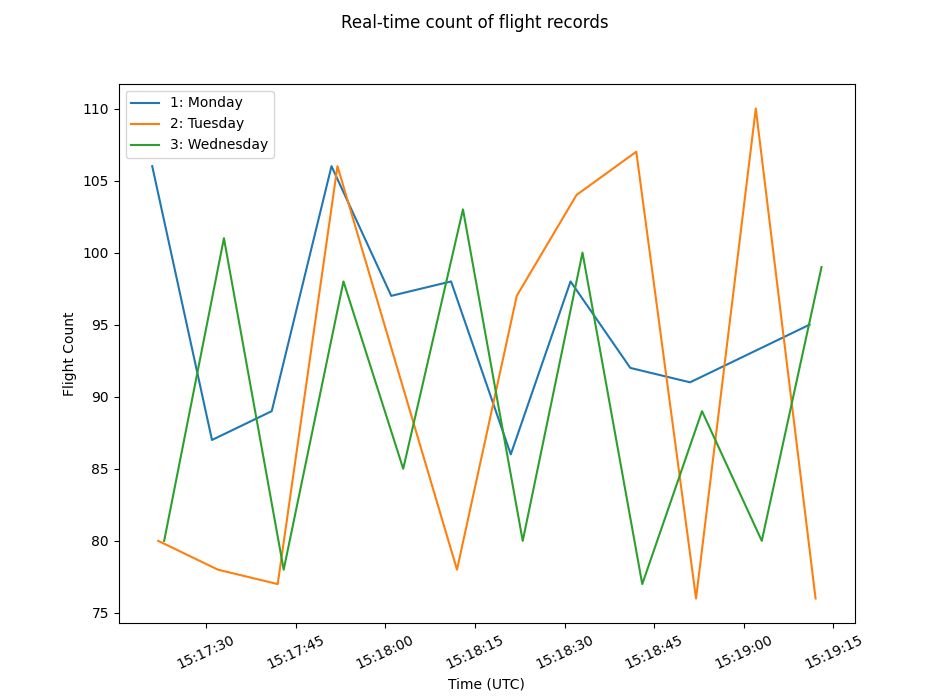

--------------------------------------------
flightKey: 1
ts: 2021-10-15 15:17:01;  countFlights: 6
ts: 2021-10-15 15:17:11;  countFlights: 86
	
flightKey: 2
ts: 2021-10-15 15:17:02;  countFlights: 5
ts: 2021-10-15 15:17:12;  countFlights: 78
	
flightKey: 3
ts: 2021-10-15 15:17:03;  countFlights: 10
ts: 2021-10-15 15:17:13;  countFlights: 80
	
--------------------------------------------
flightKey: 1
ts: 2021-10-15 15:17:01;  countFlights: 6
ts: 2021-10-15 15:17:11;  countFlights: 96
ts: 2021-10-15 15:17:21;  countFlights: 97
	
flightKey: 2
ts: 2021-10-15 15:17:02;  countFlights: 5
ts: 2021-10-15 15:17:12;  countFlights: 83
ts: 2021-10-15 15:17:22;  countFlights: 74
	
flightKey: 3
ts: 2021-10-15 15:17:03;  countFlights: 10
ts: 2021-10-15 15:17:13;  countFlights: 87
ts: 2021-10-15 15:17:23;  countFlights: 75
	
--------------------------------------------
flightKey: 1
ts: 2021-10-15 15:17:01;  countFlights: 6
ts: 2021-10-15 15:17:11;  countFlights: 96
ts: 2021-10-15 15:17:21;  countFligh

--------------------------------------------
flightKey: 1
ts: 2021-10-15 15:17:01;  countFlights: 6
ts: 2021-10-15 15:17:11;  countFlights: 96
ts: 2021-10-15 15:17:21;  countFlights: 106
ts: 2021-10-15 15:17:31;  countFlights: 87
ts: 2021-10-15 15:17:41;  countFlights: 89
ts: 2021-10-15 15:17:51;  countFlights: 106
ts: 2021-10-15 15:18:01;  countFlights: 97
ts: 2021-10-15 15:18:11;  countFlights: 98
ts: 2021-10-15 15:18:21;  countFlights: 86
ts: 2021-10-15 15:18:31;  countFlights: 98
ts: 2021-10-15 15:18:41;  countFlights: 92
ts: 2021-10-15 15:18:51;  countFlights: 81
	
flightKey: 2
ts: 2021-10-15 15:17:02;  countFlights: 5
ts: 2021-10-15 15:17:12;  countFlights: 83
ts: 2021-10-15 15:17:22;  countFlights: 80
ts: 2021-10-15 15:17:32;  countFlights: 78
ts: 2021-10-15 15:17:42;  countFlights: 77
ts: 2021-10-15 15:17:52;  countFlights: 106
ts: 2021-10-15 15:18:02;  countFlights: 92
ts: 2021-10-15 15:18:12;  countFlights: 78
ts: 2021-10-15 15:18:22;  countFlights: 97
ts: 2021-10-15 15:18:32

KeyboardInterrupt: 

In [6]:
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()    
    fig, ax = init_plots()    
    consume_messages(consumer, fig, ax)